In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Normalization of protein features

In [1]:
import pandas as pd

In [2]:
prot = pd.read_csv('clean_data/new-decagon-genes.csv',sep = ',', low_memory=False)
prot.head()

,GeneID,Length,Mass,n_helices,n_strands,n_turns,Normalized Helices(Mean),Normalized Helices(Median),Normalized Strands(Mean),Normalized Strands(Median),Normalized Turns(Mean),Normalized Turns(Median)
0,51554,350,39914,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,11112,336,35329,17,10,4,0.137097,0.137097,0.049505,0.049505,0.111111,0.111111
2,7532,247,28303,12,0,4,0.096774,0.096774,0.000000,0.000000,0.111111,0.111111
3,51412,426,46877,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,125,375,39855,18,22,4,0.145161,0.145161,0.108911,0.108911,0.111111,0.111111


17929


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb83003c358>]],
      dtype=object)

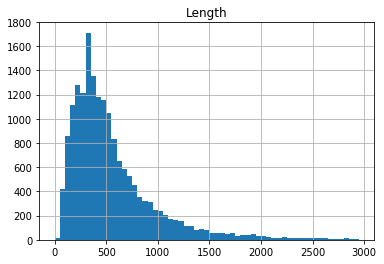

In [5]:
print(len(prot.index))
prot.hist(column='Length',bins=range(0,3000,50))

In [49]:
nor_mean = prot[['Normalized Helices(Mean)','Normalized Strands(Mean)','Normalized Turns(Mean)']]

In [50]:
nor_mean.head()

,Normalized Helices(Mean),Normalized Strands(Mean),Normalized Turns(Mean)
0,0.000000,0.000000,0.000000
1,0.137097,0.049505,0.111111
2,0.096774,0.000000,0.111111
3,0.000000,0.000000,0.000000
4,0.145161,0.108911,0.111111


In [66]:
a = nor_mean.to_numpy()
b = a>0.05
c = b.astype(int)
c

array([[0, 0, 0],
       [1, 0, 1],
       [1, 0, 1],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [67]:
def binarize(thr,df):
    arr = df.to_numpy()
    bol = arr>thr
    return bol.astype(int)

In [69]:
binarize(0.05,nor_mean)

array([[0, 0, 0],
       [1, 0, 1],
       [1, 0, 1],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [72]:
bin_list=[]
thr_list = np.arange(0,1,0.01)
for i in thr_list:
    bin_list.append(binarize(i,nor_mean))

In [75]:
import sys

In [76]:
sys.getsizeof(bin_list)

912

In [78]:
sys.getsizeof(True)

28